# Self Organizing Maps (SOM)

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

### Importing the Dataset

In [51]:
df = pd.read_csv('Credit_Card_Applications.csv')
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [52]:
len(df.columns)

16

In [53]:
df.shape

(690, 16)

In [54]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [55]:
print(x)

[[1.5776156e+07 1.0000000e+00 2.2080000e+01 ... 2.0000000e+00
  1.0000000e+02 1.2130000e+03]
 [1.5739548e+07 0.0000000e+00 2.2670000e+01 ... 2.0000000e+00
  1.6000000e+02 1.0000000e+00]
 [1.5662854e+07 0.0000000e+00 2.9580000e+01 ... 2.0000000e+00
  2.8000000e+02 1.0000000e+00]
 ...
 [1.5675450e+07 0.0000000e+00 1.8830000e+01 ... 2.0000000e+00
  1.0000000e+02 1.0000000e+00]
 [1.5776494e+07 0.0000000e+00 2.7420000e+01 ... 2.0000000e+00
  1.2000000e+02 1.2000000e+01]
 [1.5592412e+07 1.0000000e+00 4.1000000e+01 ... 1.0000000e+00
  5.6000000e+02 1.0000000e+00]]


In [56]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

#### Feature Scaling

In [57]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))
x = sc.fit_transform(x)

#### Training the SOM

In [59]:
from minisom import MiniSom

som = MiniSom(x = 10,y = 10,input_len=15,sigma = 1.0,learning_rate=0.5)  # grid 10x10

In [60]:
som.random_weights_init(x)
som.train_random(data = x,num_iteration=100)

#### Visualizing the Results

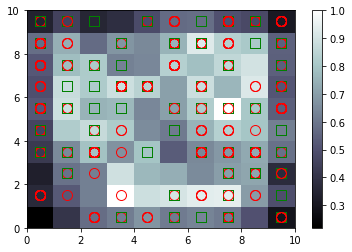

In [64]:
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']

# Assuming x is a single data point and y is a single class label
for i, x1 in enumerate(x):
    w = som.winner(x1)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 1)
show()


### Finding the Frauds

In [62]:
mappings = som.win_map(x)

In [63]:
mappings

defaultdict(list,
            {(0,
              5): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
                     0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.81120334, 1.        , 0.17789474, 0.01196429, 0.5       ,
                     0.23076923, 0.875     , 0.12280702, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.17      , 0.        ]), array([0.8735269 , 1.        , 0.29819549, 0.00892857, 0.5       ,
                     0.15384615, 0.5       , 0.14035088, 0.        , 0.        ,
                     0.        , 1.        , 0.        , 0.21      , 0.        ]), array([5.45275078e-01, 1.00000000e+00, 5.26315789e-02, 1.07142857e-01,
                     5.00000000e-01, 2.30769231e-01, 3.75000000e-01, 1.40350877e-03,
                     0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
            

In [69]:
frauds = np.concatenate((mappings[(8,1)],mappings[(6,8)]),axis=0)

In [71]:
frauds = sc.inverse_transform(frauds)
frauds

array([[1.5631451e+07, 1.0000000e+00, 2.4500000e+01, 1.3335000e+01,
        1.0000000e+00, 6.0000000e+00, 4.0000000e+00, 4.0000000e-02,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.2000000e+02, 4.7600000e+02],
       [1.5660871e+07, 1.0000000e+00, 2.6170000e+01, 1.2500000e+01,
        1.0000000e+00, 4.0000000e+00, 8.0000000e+00, 1.2500000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.8000000e+01],
       [1.5796813e+07, 1.0000000e+00, 4.1580000e+01, 1.7500000e+00,
        2.0000000e+00, 4.0000000e+00, 4.0000000e+00, 2.1000000e-01,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.6000000e+02, 1.0000000e+00],
       [1.5731166e+07, 1.0000000e+00, 4.0920000e+01, 8.3500000e-01,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00,